### Campaign Analysis (A/B Testing) <a class="anchor" id="chapter1"></a>


Objectives of marketing campaign analysis are to support businssses understand how well the ads are working and how to optimise them. For this, A/B Testing is used in practice. This test is meaningful to understand e.g. users' product satisfaction, user engagement, etc. A/B Testing consists of randomised experiments, meaning two variants (A and B) are tested against each other. This includes statistical hypothesis testing (in the field of Statistics it is called "Independent samples t-test), to test which variant is working better. Goals of A/B Testing can be to boost sales, having a higher reach, approach new customers, etc. 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


### Reading data file

Read the .csv file for analysis 

In [19]:
control_df = pd.read_csv('control_group.csv', sep = ";")
control_df

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


In [20]:
test_df = pd.read_csv('test_group.csv', sep = ";")
test_df

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768
5,Test Campaign,6.08.2019,2458,42684,31489,7488,1854,1073,882,488
6,Test Campaign,7.08.2019,2838,53986,42148,4221,2733,2182,1301,890
7,Test Campaign,8.08.2019,2916,33669,20149,7184,2867,2194,1240,431
8,Test Campaign,9.08.2019,2652,45511,31598,8259,2899,2761,1200,845
9,Test Campaign,10.08.2019,2790,95054,79632,8125,2312,1804,424,275


The objective of this analysis is to evaluate the effectiveness of a marketing campaign by comparing two distinct groups: the "Test Campaign" (experimental) group and the "Control Campaign" (control) group. Using an A/B testing framework, it will assess if the test campaign outperforms the control campaign. Differences in independent variables between the two groups are analysed, seeking to identify areas of improvement and inform future marketing strategies.

Dataset Description:

The dataset comprises data collected during a marketing campaign, consisting of observations from two distinct groups: the test campaign and the control campaign. Each observation includes information on various independent variables related to campaign performance, such as advertising spend, impressions, reach, website interactions, searches, and conversion metrics.

Campaign Groups:

- Test Campaign: The group exposed to the modified or experimental version of the marketing campaign.
- Control Campaign: The group exposed to the standard or existing version of the marketing campaign, serving as a baseline for comparison.

Independent Variables:
- Spend [USD]: The amount of money spent on advertising for each campaign group.
- Impressions: The number of times the campaign content was displayed to users.
- Reach: The total audience reached by the campaign.
- Website Clicks: The number of clicks received on the campaign's website link.
- Searches: The number of searches or queries related to the campaign or product.
- View Content: The number of times the campaign content was viewed or interacted with.
- Add to Cart: The number of times the product was added to the shopping cart.
- Purchase: The number of completed purchases or conversions resulting from the campaign.

Analysis Approach:
Using statistical techniques such as hypothesis testing and exploratory data analysis, distributions and summary statistics of these independent variables between the test and control campaign groups are checked. By assessing differences in performance metrics, insights into the effectiveness of the test campaign relative to the control campaign and identify areas for optimisation in future marketing efforts are drawn.

### 1.) Data Preparation <a class="anchor" id="chapter1"></a>

In [21]:
control_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


Note: There is a row in control_df with a missing value for 7 columns.

In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


### 1.) a.) Missing value analysis for both data sets <a class="anchor" id="section_5_1"></a>

In [23]:
control_df.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

In [24]:
missing_row_control_df = control_df.isnull().any(axis = 1)
row_missing_control_df = control_df[missing_row_control_df]
row_missing_control_df 

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Row 4 in control_df has a missing value in 7 columns. 

In [25]:
control_df = control_df.drop(4)


In [26]:
test_df.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [27]:
control_df.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2304.068966,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,363.534822,21688.922908,21832.349595,1757.369003,866.089368,777.545469,407.457973,185.028642
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1962.000000,92029.000000,74192.000000,4085.000000,1615.000000,1249.000000,930.000000,372.000000
50%,2319.000000,113430.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000
75%,2544.000000,121332.000000,102479.000000,6628.000000,2711.000000,2421.000000,1641.000000,670.000000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


Normality Test using Shapiro-Wilk Test while controling for both control and test group

### 2.) Data analysi <a class="anchor" id="section_5_1"></a>

### 2.) a.) Descriptive Statistics <a class="anchor" id="section_5_1"></a>

In [28]:
test_df.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


Joining both datasets

In [29]:
df = pd.concat([control_df, test_df], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        59 non-null     object 
 1   Date                 59 non-null     object 
 2   Spend [USD]          59 non-null     int64  
 3   # of Impressions     59 non-null     float64
 4   Reach                59 non-null     float64
 5   # of Website Clicks  59 non-null     float64
 6   # of Searches        59 non-null     float64
 7   # of View Content    59 non-null     float64
 8   # of Add to Cart     59 non-null     float64
 9   # of Purchase        59 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.7+ KB


In [30]:
df.drop('Date', axis = 1, inplace = True)

### 2.) b.) Univarite analysis <a class="anchor" id="section_5_1"></a>

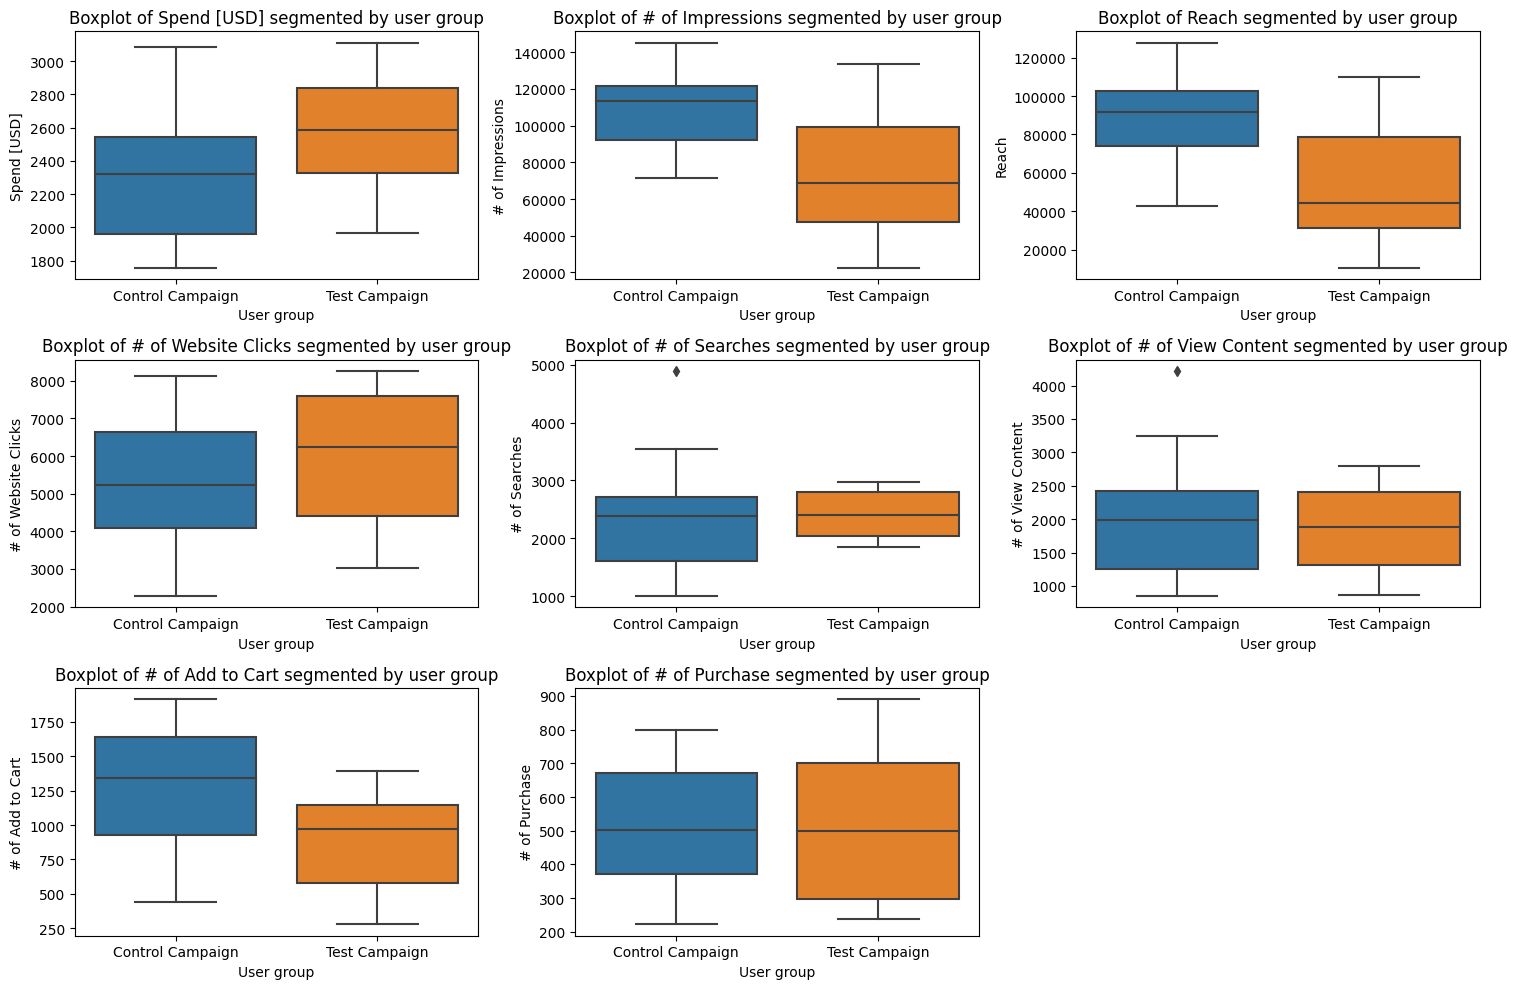

In [31]:
variable_continuous = ['Spend [USD]', '# of Impressions', 'Reach', '# of Website Clicks', '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase']

num_variables = len(variable_continuous)
num_cols = 3  # Number of columns next to each other
num_rows = (num_variables + num_cols - 1) // num_cols

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

axes = axes.flatten()

# Boxplots
for i, var in enumerate(variable_continuous):
    sns.boxplot(data=df, x='Campaign Name', y=var, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var} segmented by user group')
    axes[i].set_xlabel('User group')
    axes[i].set_ylabel(var)

# Removing any empty subplots
for j in range(num_variables, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Boxplot Insights

The 8 boxplots are segmented by user group (Control Campaign vs. Test Campaign) for three different independent variables: Spend [USD], # of Impressions, Searches, view content, add to cart and purchase.

(1) Boxplot of Spend [USD] segmented by user group:
- The leftmost boxplot illustrates the distribution of advertising spend (in USD) for the Control Campaign and Test Campaign groups.
- The Control Campaign group (blue) has a narrower interquartile range compared to the Test Campaign group (orange), indicating less variability in advertising spend.
- The median spend appears to be slightly higher for the Test Campaign group compared to the Control Campaign group.

(2) Boxplot of # of Impressions segmented by user group:
This visual is a boxplot segmented by user group (Control Campaign vs. Test Campaign) for the independent variable '# of Impressions'. 
The visual shows that the Test Campaign may have resulted in a higher median number of impressions compared to the Control Campaign. However, it also indicates greater variability in impression counts within the Test Campaign group. Hypothesis testing is needed to see if observed differences in impression counts between the two groups are statistically significant.

(3) Boxplot of Reach segmented by user group: Similar to Impressions the boxplot displays that the Test Campaign has a higher median number of impressions received in the ad compared to the Control Campaign.

(4) Boxplot of Website Clicks:
The number of website clicks received through ads shows a higher median compared to the control group. The whiskers of the control group are longer, indicating a greater variability (or dispersion) in the distribution of the data.

(5) Boxplot of searches:
Both groups show a similar median. However, the amount of users who performed searches on the website is narrower for the test campaign, suggesting there is less spread in the dataset, with the majority of observations falling within a narrower range of values around the median.

(6) Boxplot of view content:
The median for both groups lie who viewed products and content on the website lie around 2000. The first quartile (Q1) is larger, meaning the lower 25% of the data points in that group are higher compared to the other group. Furthermore, the whiskers are longer, suggesting more variability.

(7) Boxplot of add to cart:

Both groups show different data for the number of users who added products to the cart.The Control Campaign group exhibits greater variability in performance metrics, with a wider range of values and longer whiskers. Despite the higher median, the Control Campaign group's data distribution is more spread out, suggesting a broader range of outcomes. In contrast, the Test Campaign group shows less variability and tighter clustering around the median, with shorter whiskers indicating a more consistent performance across observations.
These differences may suggest the Control Campaign group experiences more diverse outcomes, while the Test Campaign group demonstrates more consistent performance, albeit at a slightly lower level.

(8) Boxplot of Purchase: 

The boxplot for the Test Campaign group is longer compared to the Control Campaign group. This indicates there is greater variability or dispersion in the data for the Test Campaign group compared to the Control Campaign group. The upper whisker are  longer for the Test Campaign group compared to the Control Campaign group. This suggest greater variability or spread in the data at the upper end for the Test Campaign group.
Moreover, the tail is shorter at the beginning (lower whisker) for the Test Campaign group, indicating less variability or spread at the lower end compared to the Control Campaign group.

### 3.) Hypothesis Testing <a class="anchor" id="section_5_1"></a>

Given the results, the following the following assumptions will be checked using A/B Testing:

- Null Hypothesis (H0): There is no significant difference between the test campaign and control campaign in terms of the independent variables.
- Alternative Hypothesis (H1): There are significant differences between the test campaign and control campaign in terms of the independent variables.

### 3.) a.) Normality Test using Shapiro-Wilk Test while controling for both control and test group <a class="anchor" id="section_5_1"></a>

In [32]:
from scipy.stats import shapiro


variable_continuous = ['Spend [USD]', '# of Impressions', 'Reach', '# of Website Clicks', '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase']

# Set the significance level (alpha)
alpha = 0.05

# Iterate over each continuous variable
for var in variable_continuous:
    # Subset data for control and test campaigns
    control_data = df[df['Campaign Name'] == 'Control Campaign'][var]
    test_data = df[df['Campaign Name'] == 'Test Campaign'][var]
    
    # Perform Shapiro-Wilk test for normality
    _, p_control = stats.shapiro(control_data)
    _, p_test = stats.shapiro(test_data)
    
    
    
    # Check if p-values are less than alpha
    control_msg = f"Shapiro-Wilk test p-value for {var} (control campaign): {p_control:.4f}. Therefore, The data for {var} in the control campaign appears to be normally distributed." if p_control > alpha else f"Shapiro-Wilk test p-value for {var} (control campaign): {p_control:.4f}. Therefore, \033[1;34mThe data for {var} in the control campaign does not appear to be normally distributed.\033[0m"
    test_msg = f"Shapiro-Wilk test p-value for {var} (test campaign): {p_test:.4f}. Therefore, The data for {var} in the test campaign appears to be normally distributed." if p_test > alpha else f"Shapiro-Wilk test p-value for {var} (test campaign): {p_test:.4f}. Therefore, \033[1;34mThe data for {var} in the test campaign does not appear to be normally distributed.\033[0m"
    
    # Print results for each variable
    print(control_msg)
    print(test_msg)
 
    print()  # Add a blank line for readability

Shapiro-Wilk test p-value for Spend [USD] (control campaign): 0.3693. Therefore, The data for Spend [USD] in the control campaign appears to be normally distributed.
Shapiro-Wilk test p-value for Spend [USD] (test campaign): 0.1171. Therefore, The data for Spend [USD] in the test campaign appears to be normally distributed.

Shapiro-Wilk test p-value for # of Impressions (control campaign): 0.1172. Therefore, The data for # of Impressions in the control campaign appears to be normally distributed.
Shapiro-Wilk test p-value for # of Impressions (test campaign): 0.1537. Therefore, The data for # of Impressions in the test campaign appears to be normally distributed.

Shapiro-Wilk test p-value for Reach (control campaign): 0.6481. Therefore, The data for Reach in the control campaign appears to be normally distributed.
Shapiro-Wilk test p-value for Reach (test campaign): 0.0570. Therefore, The data for Reach in the test campaign appears to be normally distributed.

Shapiro-Wilk test p-val

### Normality Test Insights

When conducting a Shapiro-Wilk test for normality, obtaining a p-value less than the chosen significance level (here: it is less than 0.05) indicates evidence against the null hypothesis of normality. Conversely, a p-value greater than or equal to 0.05 suggests there is not sufficient evidence to reject the null hypothesis (H0). Therefore, the alternative hypothesis (H1) considers the data to be normally distributed.

The test shows 13 variables follow normal distribution. However, 5 variables show a p-value of less than 0.05. The Shapiro-Wilk test is sensitive to skewness and outliers in the data. Extreme values or skewness in the data can affect the test's ability to detect departures from normality accurately.

If the data violate the assumption of normality, using non-parametric tests can be a valid alternative. There is a mix of variables with and without normal distribution in both the control and test groups. Using a combination of further parametric and non-parametric tests could be used. Given the research question, if there are differences between groups, this is not considered.


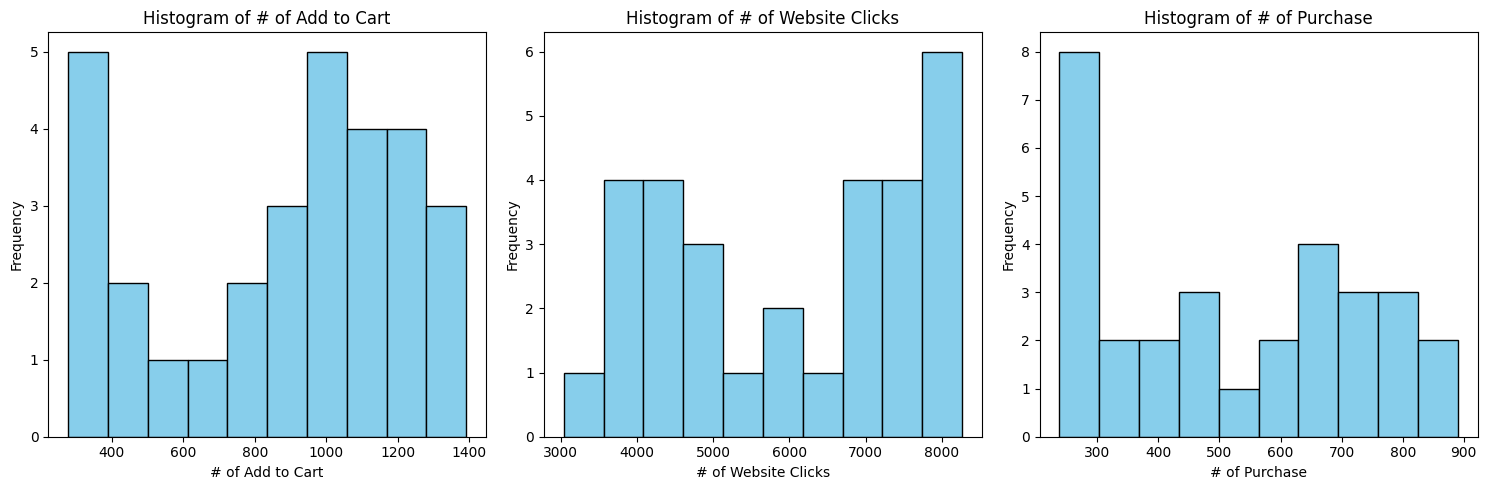

In [33]:
test_campaign_data = df[df['Campaign Name'] == 'Test Campaign']

# Extract the data for each variable
add_to_cart_data = test_campaign_data['# of Add to Cart']
website_clicks_data = test_campaign_data['# of Website Clicks']
purchase_data = test_campaign_data['# of Purchase']

# Create subplots with three histograms in a single row
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for # of Add to Cart
axs[0].hist(add_to_cart_data, bins=10, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of # of Add to Cart')
axs[0].set_xlabel('# of Add to Cart')
axs[0].set_ylabel('Frequency')

# Histogram for # of Website Clicks
axs[1].hist(website_clicks_data, bins=10, color='skyblue', edgecolor='black')
axs[1].set_title('Histogram of # of Website Clicks')
axs[1].set_xlabel('# of Website Clicks')
axs[1].set_ylabel('Frequency')

# Histogram for # of Purchase
axs[2].hist(purchase_data, bins=10, color='skyblue', edgecolor='black')
axs[2].set_title('Histogram of # of Purchase')
axs[2].set_xlabel('# of Purchase')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

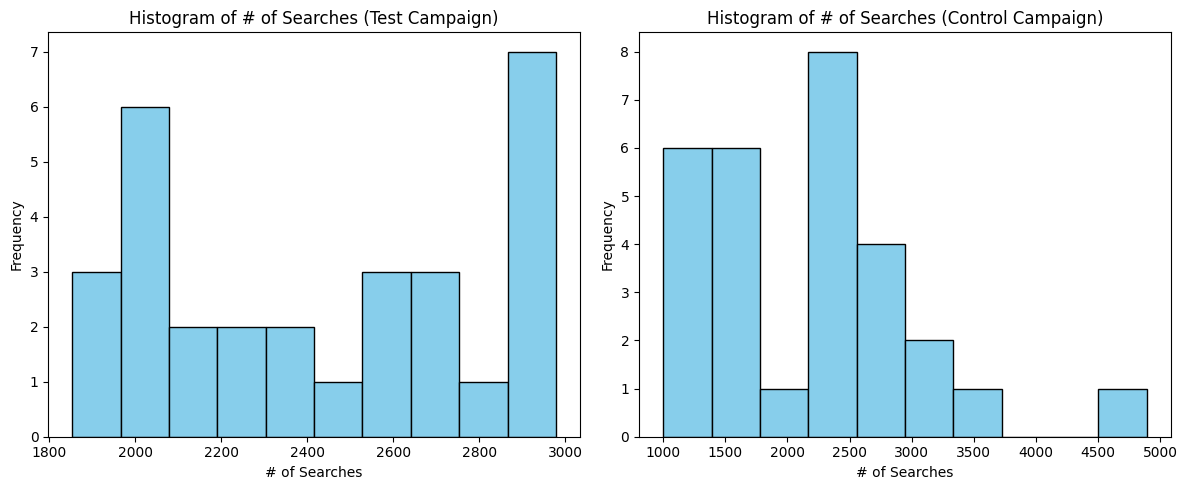

In [34]:
test_campaign_data = df[df['Campaign Name'] == 'Test Campaign']
control_campaign_data = df[df['Campaign Name'] == 'Control Campaign']

# Extract the data for # of Searches for both groups
test_searches_data = test_campaign_data['# of Searches']
control_searches_data = control_campaign_data['# of Searches']

# Create subplots with histograms for both groups
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for # of Searches in Test Campaign
axs[0].hist(test_searches_data, bins=10, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of # of Searches (Test Campaign)')
axs[0].set_xlabel('# of Searches')
axs[0].set_ylabel('Frequency')

# Histogram for # of Searches in Control Campaign
axs[1].hist(control_searches_data, bins=10, color='skyblue', edgecolor='black')
axs[1].set_title('Histogram of # of Searches (Control Campaign)')
axs[1].set_xlabel('# of Searches')
axs[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### 3.) b.) Homogeneity of variances: Levene <a class="anchor" id="section_5_1"></a>

In [35]:
from scipy.stats import levene

variable_continuous = ['Spend [USD]', '# of Impressions', 'Reach', '# of Website Clicks', '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase']

# Perform Levene's test for each variable
for var in variable_continuous:
    # Extract data for the two groups
    group1_data = df[df['Campaign Name'] == 'Test Campaign'][var]
    group2_data = df[df['Campaign Name'] == 'Control Campaign'][var]
    
    # Perform Levene's test
    stat, p_value = levene(group1_data, group2_data)
    
    # Print the results
    print(f"Levene's test for {var}:")
    print(f"Test Statistic: {stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    if p_value > 0.05:
        print("The variances of the two groups are approximately equal.")
    else:
        print("The variances of the two groups are not equal.")
    print()

Levene's test for Spend [USD]:
Test Statistic: 0.0167
P-value: 0.8976
The variances of the two groups are approximately equal.

Levene's test for # of Impressions:
Test Statistic: 6.8867
P-value: 0.0111
The variances of the two groups are not equal.

Levene's test for Reach:
Test Statistic: 2.1187
P-value: 0.1510
The variances of the two groups are approximately equal.

Levene's test for # of Website Clicks:
Test Statistic: 0.0419
P-value: 0.8385
The variances of the two groups are approximately equal.

Levene's test for # of Searches:
Test Statistic: 9.0628
P-value: 0.0039
The variances of the two groups are not equal.

Levene's test for # of View Content:
Test Statistic: 0.7690
P-value: 0.3842
The variances of the two groups are approximately equal.

Levene's test for # of Add to Cart:
Test Statistic: 1.4291
P-value: 0.2369
The variances of the two groups are approximately equal.

Levene's test for # of Purchase:
Test Statistic: 1.2303
P-value: 0.2720
The variances of the two groups 

### Levene Test insight

The assumption of equal variances is not met for Impressions and Searches. Therefore, an alternative approach is to use non-parametric tests (Mann-Whitney U test). 
The Mann-Whitney U test is used to compare the distribution of a continuous variable between two independent groups when the assumptions of the t-test are not satisfied, including unequal variances or non-normality.

### 3.) c.) Homogeneity of variances: Mann-Whitney U test<a class="anchor" id="section_5_1"></a>test

In [36]:
from scipy.stats import mannwhitneyu

variable_continuous = ['Spend [USD]', '# of Impressions', 'Reach', '# of Website Clicks', '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase']

for variable in variable_continuous:
    group1_data = df[df['Campaign Name'] == 'Test Campaign'][var]
    group2_data = df[df['Campaign Name'] == 'Control Campaign'][var]

    # Mann-Whitney U test
    statistic, p_value = mannwhitneyu(group1_data, group2_data)


    print("Mann-Whitney U test:")
    print(f"Test Statistic: {statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print("There is a significant difference between the two groups.")
    else:
        print("There is no significant difference between the two groups.")

Mann-Whitney U test:
Test Statistic: 431.0000
P-value: 0.9577
There is no significant difference between the two groups.
Mann-Whitney U test:
Test Statistic: 431.0000
P-value: 0.9577
There is no significant difference between the two groups.
Mann-Whitney U test:
Test Statistic: 431.0000
P-value: 0.9577
There is no significant difference between the two groups.
Mann-Whitney U test:
Test Statistic: 431.0000
P-value: 0.9577
There is no significant difference between the two groups.
Mann-Whitney U test:
Test Statistic: 431.0000
P-value: 0.9577
There is no significant difference between the two groups.
Mann-Whitney U test:
Test Statistic: 431.0000
P-value: 0.9577
There is no significant difference between the two groups.
Mann-Whitney U test:
Test Statistic: 431.0000
P-value: 0.9577
There is no significant difference between the two groups.
Mann-Whitney U test:
Test Statistic: 431.0000
P-value: 0.9577
There is no significant difference between the two groups.


Keeping in mind, the Levene's test indicated that the variances of the two groups are approximately equal for only a subset of the variables. On the other hand, the Mann-Whitney U test is a non-parametric test to compare the distributions of a continuous variable between two independent groups. This indicates that there is no statistically significant difference in the distribution of the variable between the two groups for the subset of variables with approximately equal variances.

The non-significant results imply that, for the subset of variables where variances are equal according to the Levene test (Spend, Reach, Website Clicks, View Content and add to cart), the distribution of the variable does not differ significantly between the groups. Both groups show similar patterns in these variables.

### Insights

According to A/B Test results, there are no meaningful difference between methods used. For deeper insights into the Marketing campaign, the sample size could be increased. Second, longnitudinal data could be applied and investigate the differences between groups over time. Third, common KPIs such as CTR could be used to compare. 

### 4.) Key performance data analysis<a class="anchor" id="section_5_1"></a>

To get deeper insights into the data of Marketing campaign, common key performance indicators (KPIs) are used to see the difference between the two groups.

- (1) Click-Through Rate (CTR):
It measures how many people click on an ad after seeing it. Example: Higher CTR means more people are interested in the ad.
- (2) Conversion Rate (CR): Shows the percentage of people who take a desired action (like making a purchase) after clicking on the ad. Example: Higher CR means more people are completing the desired action.
- (3) Cost per Click (CPC): Indicates how much advertisers pay for each click on their ad. Example: Lower CPC means advertisers are paying less for each click.
- (4) Return On Investment (ROI): Measures the profitability of an advertising campaign by comparing the return (like revenue generated) to the cost. Example: Positive ROI means the campaign was profitable, while negative ROI means it wasn't.

In [37]:
df['CTR'] = (df['# of Website Clicks'] / df['# of Impressions']) * 100
df['CR'] = (df['# of Purchase'] / df['# of Website Clicks']) * 100
df['CPC'] = df['Spend [USD]'] / df['# of Website Clicks']
df['ROI'] = ((df['# of Purchase'] - df['Spend [USD]']) / df['Spend [USD]']) * 100


df[['CTR', 'CR','CPC','ROI']].head()

,CTR,CR,CPC,ROI
0,8.483471,8.808438,0.324971,-72.894737
1,6.700264,6.300863,0.216646,-70.916335
2,4.941121,5.716042,0.360018,-84.122919
3,4.205659,11.092985,0.632953,-82.474227
4,3.692838,18.967229,0.765392,-75.218943


In [38]:
# Grouping the DataFrame by "Campaign Name" and calculating the mean of each KPI
df_KPIs = df.groupby("Campaign Name").agg({"CTR":"mean","CR":"mean","CPC":"mean","ROI":"mean"})
df_KPIs

,CTR,CR,CPC,ROI
Campaign Name,,,,
Control Campaign,5.095871,11.477203,0.494908,-76.795810
Test Campaign,10.242260,9.231182,0.468718,-79.342253


Insights:
(1) Control Campaign:
- Click-Through Rate (CTR): On average, around 5.10% of users who view the ad click on it.
- Conversion Rate (CR): On average, around 11.48% of users who clicked on the ad completed the desired action (e.g., made a purchase).
- Cost per Click (CPC): On average, advertisers pay $0.49 for each click on the ad.
- Return On Investment (ROI): On average, the campaign results in a negative ROI of -76.80%, indicating that the campaign generates less revenue than the cost invested in it.

(2) Test Campaign:
- Click-Through Rate (CTR): On average, 10.24% of users who view the ad click on it.
- Conversion Rate (CR): On average, 9.23% of users who clicked on the ad completed the desired action.
- Cost per Click (CPC): On average, advertisers pay $0.47 for each click on the ad.
- Return On Investment (ROI): On average, the campaign results in a negative ROI of -79.34%.


The Test Campaign generally outperforms the Control Campaign in terms of CTR, suggesting it attracts more clicks from users. However, the Control Campaign has a higher Conversion Rate compared to the Test Campaign. This suggests a higher proportion of users who clicked on the ad completed the desired action. Both campaigns have similar CPC values, with the Test Campaign slightly lower.
Both campaigns result in negative ROIs. This means they are not generating positive returns and may need optimisations to improve their effectiveness.

In [39]:
from scipy import stats

test_df['CTR'] = test_df['# of Website Clicks'] / test_df['# of Impressions']
control_df['CTR'] = control_df['# of Website Clicks'] / control_df['# of Impressions']

t_stat, p_value = stats.ttest_ind(control_df['CTR'],test_df['CTR'] )
print("p value : {}".format(p_value))

if p_value < 0.05:  
    print("The Test Campaign significantly outperforms the Control Campaign.")
    print("There is significant differences between Click through rate results for two campaigns")
else:
    print("There is no significant difference between the Test and Control Campaigns.")

p value : 0.00023846922202713992
The Test Campaign significantly outperforms the Control Campaign.
There is significant differences between Click through rate results for two campaigns


In [40]:
control_df['Conversion Rate'] = control_df['# of Purchase'] / control_df['# of Website Clicks']
test_df['Conversion Rate'] = test_df['# of Purchase'] / test_df['# of Website Clicks']

t_stat, p_value = stats.ttest_ind(test_df['Conversion Rate'], control_df['Conversion Rate'])
print("p value : {}".format(p_value))

if p_value < 0.05:  
    print("The Test Campaign significantly outperforms the Control Campaign.")
    print("There is no significant difference between Click through rate for two campaigns")
else:
    print("There is no significant difference between the Test and Control Campaigns.")

p value : 0.13901844271836933
There is no significant difference between the Test and Control Campaigns.


In [41]:
control_df['CPC'] = control_df['Spend [USD]'] / control_df['# of Website Clicks']
test_df['CPC'] = test_df['Spend [USD]'] / test_df['# of Website Clicks']

t_stat, p_value = stats.ttest_ind(test_df['Conversion Rate'], control_df['Conversion Rate'])
print("p value : {}".format(p_value))

if p_value < 0.05:  
    print("The Test Campaign significantly outperforms the Control Campaign.")
    print("There is no significant difference between Click through rate for two campaigns")
else:
    print("There is no significant difference between the Test and Control Campaigns.")

p value : 0.13901844271836933
There is no significant difference between the Test and Control Campaigns.


### 4.) Conclusion<a class="anchor" id="section_5_1"></a>

The analysis suggests that the Control Campaign generated higher sales and user engagement overall. It attracted more product views and resulted in more products added to the cart, leading to higher sales.

On the other hand, the Test Campaign had a higher conversion rate for products added to the cart. This means that although it had fewer product views, a higher percentage of those views resulted in actual purchases.

In conclusion, the Test Campaign is suitable for targeting specific products to a targeted audience, whereas the Control Campaign is more effective for marketing multiple products to a broader audience.